In [1]:
# External packages
import pickle
import sys
import time
import matplotlib.pyplot as plt 
import numpy as np
import pickle
from os import path 
sys.path.append(r"../tools/") 

# Internal packages
from system import modelinput
from system import tanksystem
from system import sensors 
from autocalibration import autocal 
from filters import HighPassFilter
from control import PIcontroller

# Get simulated measurement error

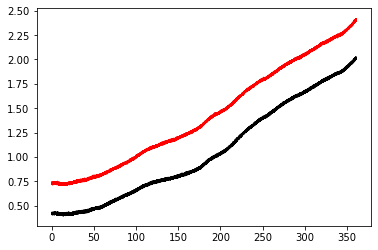

In [2]:
filename = './result/result_step1_measurement_error.pckl'
infile = open(filename,'rb')
[t_,measurement_error,offset,noise] = pickle.load(infile)
infile.close()

plt.plot(t_ ,measurement_error[0,:],'k-') 
plt.plot(t_ ,measurement_error[1,:],'r--') ;


 Scenario A

 Discontinuity crossed for the first time at: 2.667d .

 Scenario B

 Discontinuity crossed for the first time at: 2.667d .


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

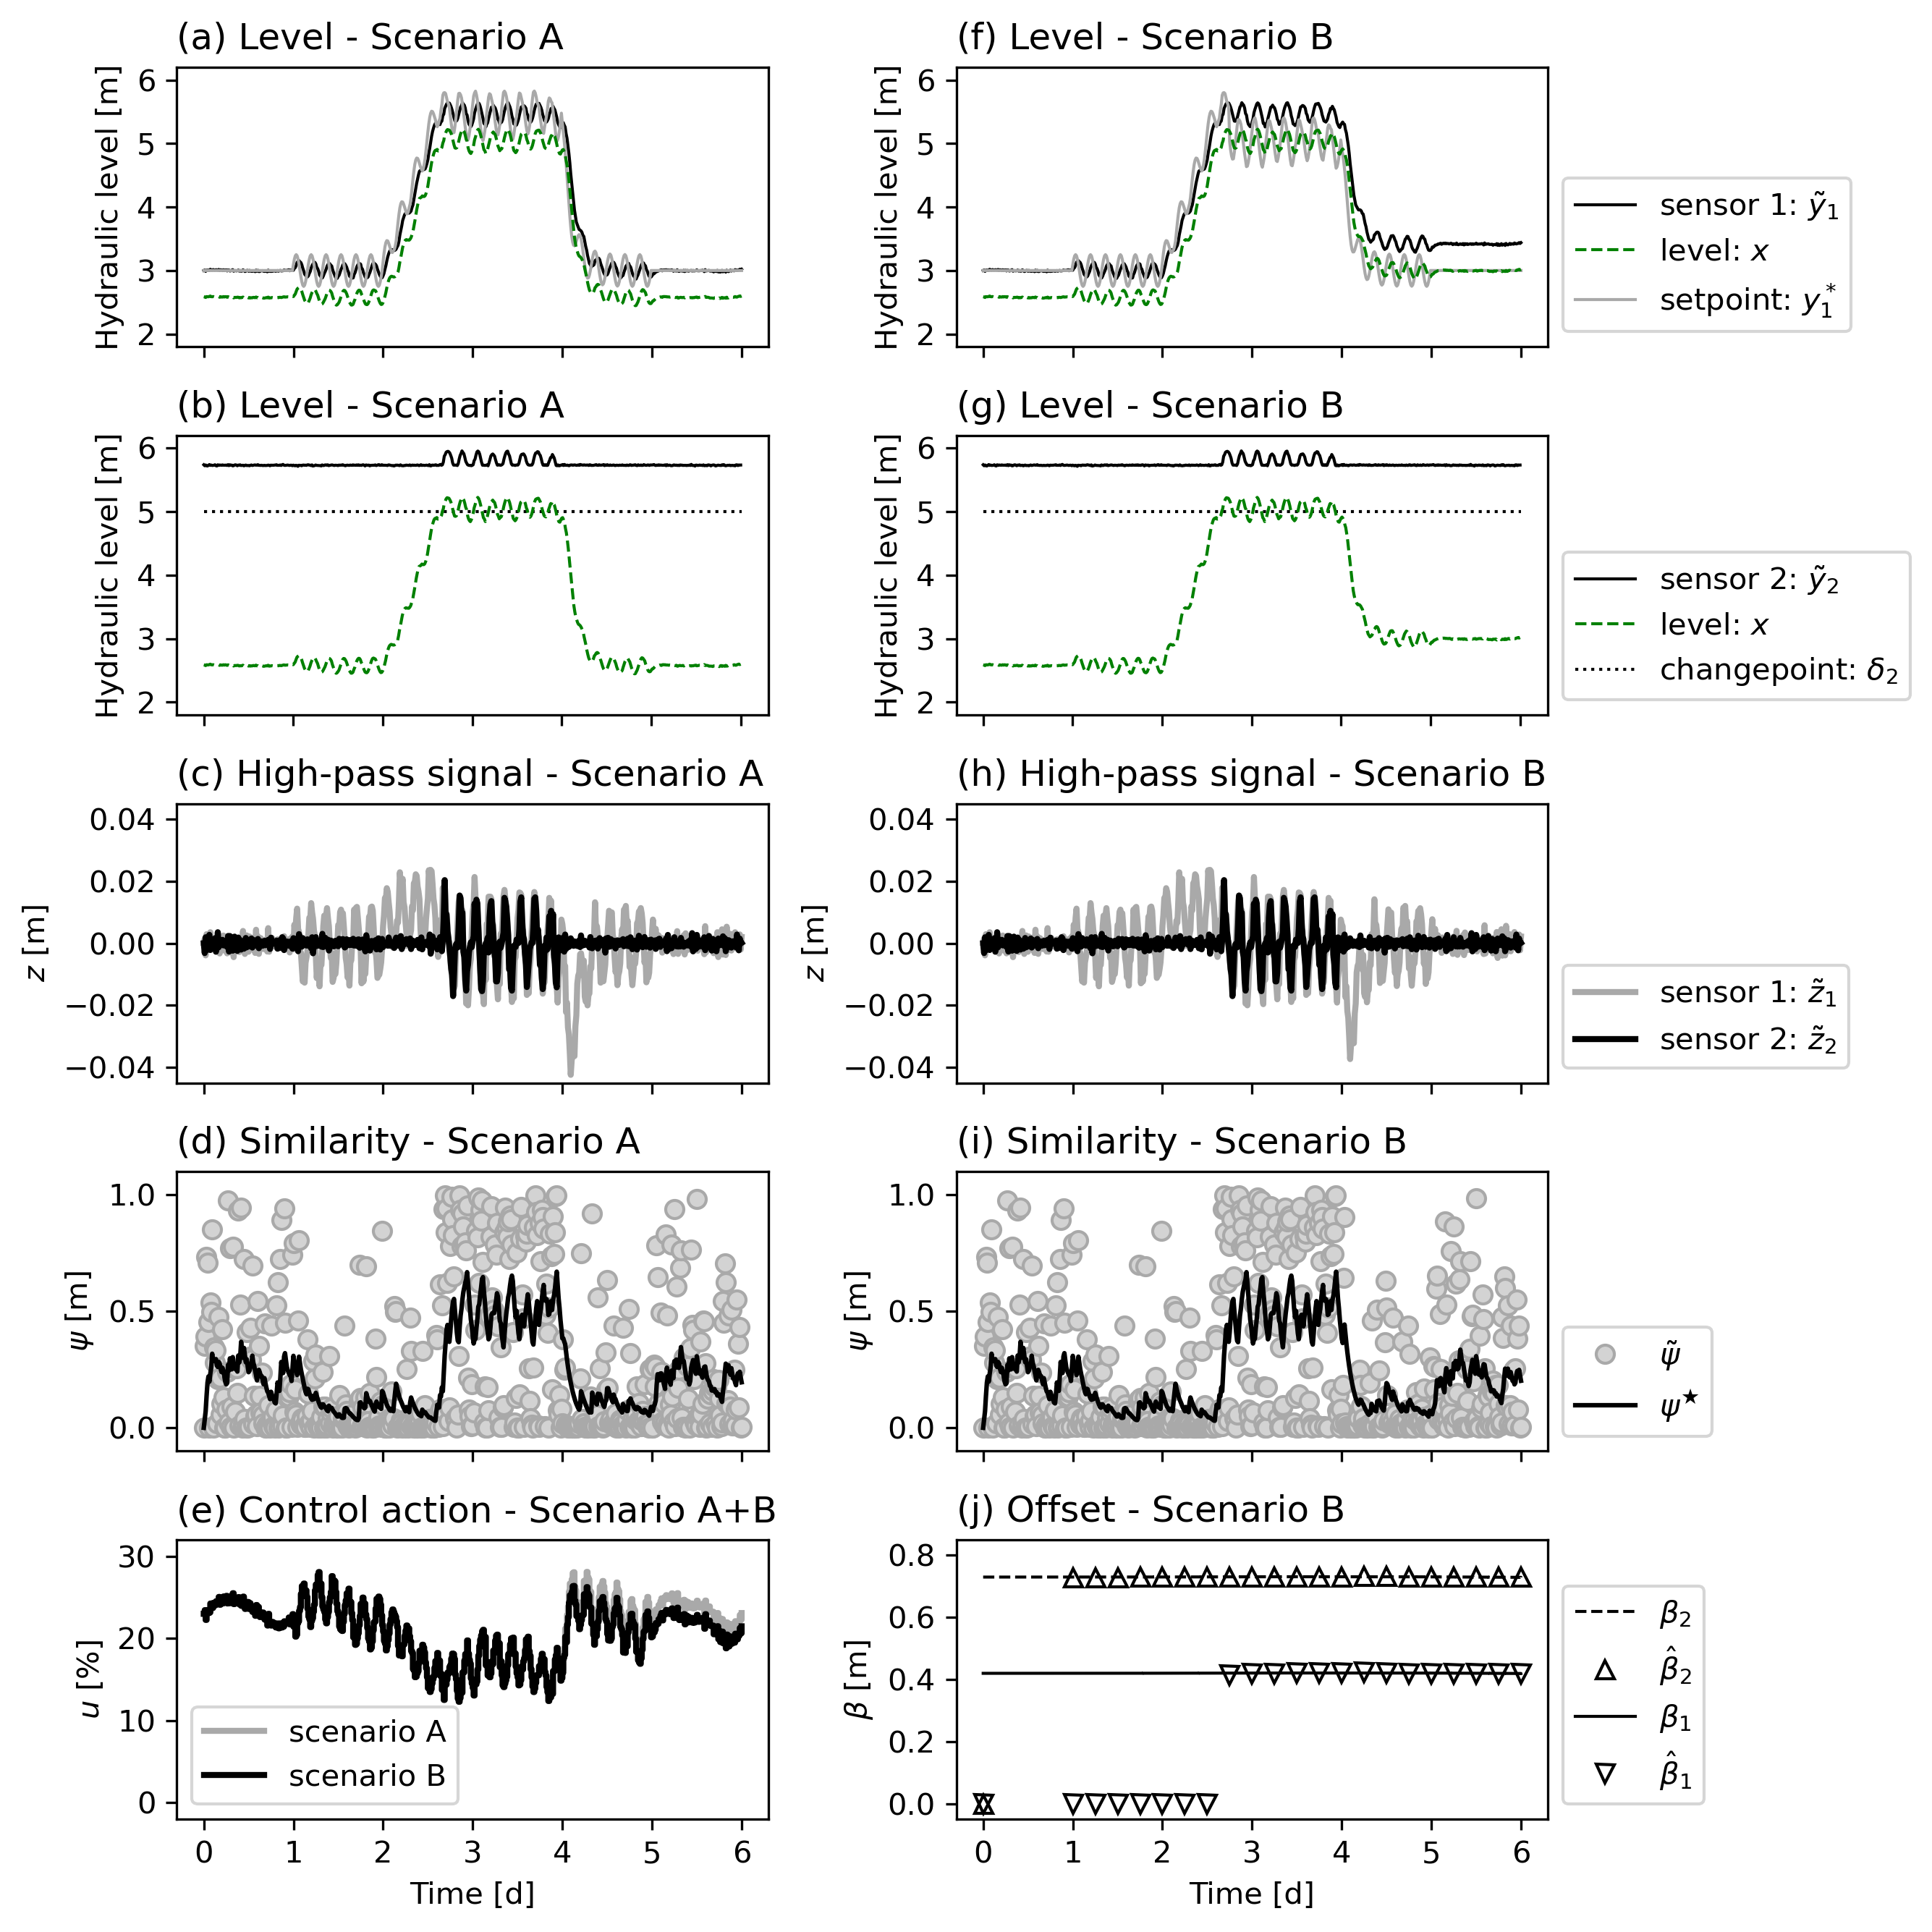

In [3]:
# Figure 1 - Scenario A and B
fig, axs = plt.subplots(5,2,figsize=(9,9),dpi=300)
panelnumber = 0
        
for scenario in range(0,2):
    
    print('\n Scenario '+chr(ord('A')+scenario) )
    
    filename = 'results_scenario_'+chr(ord('A')+scenario)+'.pckl'
    infile = open(filename,'rb')
    results = pickle.load(infile)
    
    trajectory_x = results['x']
    trajectory_y = results['y']
    trajectory_y_adjusted = results['y_adjusted']
    trajectory_y_hp = results['y_hp']
    trajectory_u = results['u']
    trajectory_y0_setpoint = results['y0_setpoint']
    trajectory_psi_tilde =  results['psi_tilde']
    ts = results['t_cal']
    trajectory_beta_hat =  results['beta']
    delta =  results['delta']
    PImaster = results['PImaster']
    N = len(trajectory_x)
    
    t_cross = t_[np.where(trajectory_x>delta[1])[0][0]]
    if True:
        print('\n Discontinuity crossed for the first time at: '+str(np.round(t_cross,3))+'d .')

        ax = axs[0,scenario]   
        ax.plot(t_[:N],trajectory_y[:,0],'k-',lw=1,label=r'sensor 1: $\tilde{y}_1$',zorder=0) 
        ax.plot(t_[:N],trajectory_x[:,0],'g--',lw=1,label=r'level: $x$',zorder=2) 
        ax.plot(t_[:N],trajectory_y0_setpoint,'-',color='darkgrey',lw=1,label=r'setpoint: $y^*_1$',zorder=1)  
        ax.set_ylim([1.8,+6.2]) 
        ax.set_yticks(np.arange(2,6.1,1))
        ax.set_xticks(np.arange(0,7))
        ax.set_ylabel(r'$x$, $y_1$ [m]')
        ax.set_ylabel('Hydraulic level [m]')
        ax.set_xticklabels(labels=[])
        if scenario==1:
            ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
            pass
        ax.set_title('('+ chr(ord('a')+panelnumber)+') Level - Scenario '+chr(ord('A')+scenario), loc='left')
        panelnumber +=1 
        
        ax = axs[1,scenario]  
        ax.plot(t_[:N],trajectory_y[:,1],'k-',lw=1,label=r'sensor 2: $\tilde{y}_2$',zorder=0) 
        ax.plot(t_[:N],trajectory_x[:,0],'g--',lw=1,label=r'level: $x$',zorder=2)   
        ax.hlines(y=5,xmin=0,xmax=t_[N],color='black',lw=1,linestyle=':',label=r'changepoint: $\delta_2$',zorder=1)
        ax.set_ylim([1.8,+6.2])
        ax.set_yticks(np.arange(2,6.1,1))
        ax.set_xticks(np.arange(0,7))
        ax.set_ylabel('Hydraulic level [m]')
        ax.set_xticklabels(labels=[])
        if scenario==1:
            ax.legend(loc='lower left', bbox_to_anchor=(1, 0)) 
            pass
        ax.set_title('('+ chr(ord('a')+panelnumber)+') Level - Scenario '+chr(ord('A')+scenario), loc='left')
        panelnumber +=1 
        
        ax = axs[2,scenario] 
        ax.plot(t_[:N],trajectory_y_hp[:,0],'-',color='darkgrey' ,lw=2,label=r'sensor 1: $\tilde{z}_1$') 
        ax.plot(t_[:N],trajectory_y_hp[:,1],'k-',lw=2,label=r'sensor 2: $\tilde{z}_2$')   
        ax.set_ylim([-0.045,+0.045])
        ax.set_yticks(np.arange(-0.04,+0.041,0.02))
        ax.set_xticks(np.arange(0,7))
        ax.set_ylabel(r'$z$ [m]')
        ax.set_xticklabels(labels=[])
        if scenario==1:
            ax.legend(loc='lower left', bbox_to_anchor=(1, 0)) 
            pass
        ax.set_title('('+ chr(ord('a')+panelnumber)+') High-pass signal - Scenario '+chr(ord('A')+scenario), loc='left')
        panelnumber +=1 
        
        ax = axs[3,scenario]   
        ax.step(t_[:N],trajectory_psi_tilde,'o',mfc='lightgrey',color='darkgrey',lw=2,where='post',label=r'$\tilde{\psi}$')   
        trajectory_psi_filt = trajectory_psi_tilde
        for k in range(1,N):
            trajectory_psi_filt[k] = (1+PImaster.I)*trajectory_psi_filt[k-1]-PImaster.I*(trajectory_psi_tilde[k])
            pass
        ax.plot(t_[:N],trajectory_psi_filt ,'k-',label=r'$\psi^{\bigstar}$' )  
        ax.set_ylim([-.1,+1.1])
        ax.set_xticks(np.arange(0,7))
        ax.set_ylabel(r'$\psi$ [m]')
        ax.set_xticklabels(labels=[])
        if scenario==1:
            ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
            pass
        ax.set_title('('+ chr(ord('a')+panelnumber)+') Similarity - Scenario '+chr(ord('A')+scenario), loc='left')
        panelnumber +=1 
        
        ax = axs[4,0]  
        if scenario==0:
            ax.step(t_[:N],trajectory_u*100,'-',color='darkgrey',lw=2,where='post',label=r'scenario A') 
            ax.set_title('('+ chr(ord('a')+panelnumber)+') Control action - Scenario A+B', loc='left') 
            panelnumber +=1  
            pass
        else:
            ax.step(t_[:N],trajectory_u*100,'k-',lw=2,where='post',label=r'scenario B')   
            ax.legend(loc='lower left')
            ax.autoscale()
            ax.set_ylim([-2,32])
            ax.set_xticks(np.arange(0,7))
            ax.set_xlabel('Time [d]')
            ax.set_ylabel(r'$u$ [%]')
            pass
        
        ax = axs[4,1]  
        if scenario==0:
            pass
        else:
            ax.step(t_[:N],offset[1,:N].T,'--',color='black',lw=1,where='post',label=r'$\beta_2$') 
            ax.step(ts,trajectory_beta_hat[1,:].T,'^',color='black',mfc='None',lw=2,where='post',label=r'$\hat{\beta}_2$') 
            ax.step(t_[:N],offset[0,:N].T,'-',color='black',lw=1,where='post',label=r'$\beta_1$')   
            ax.step(ts,trajectory_beta_hat[0,:].T,'v',color='black',mfc='None',lw=2,where='post',label=r'$\hat{\beta}_1$')   
            ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
            ax.autoscale()
            ax.set_ylim([-.05,+.85])  
            ax.set_yticks(np.arange(-0,+0.81,0.2))
            ax.set_xticks(np.arange(0,7))
            ax.set_xlabel('Time [d]')
            ax.set_ylabel(r'$\beta$ [m]')
            ax.set_title('('+ chr(ord('a')+panelnumber)+') Offset - Scenario '+chr(ord('A')+scenario), loc='left')
            panelnumber +=1
            pass
                         
        plt.tight_layout()
        
    pass

fig.savefig('./figure/results_scenario_A_and_B.eps',bbox_inches='tight');
fig.savefig('./figure/results_scenario_A_and_B.tiff',bbox_inches='tight');

1.0
[-6.59520256e-13  7.29894329e-01]
2.75
[0.41445116 0.73011369]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


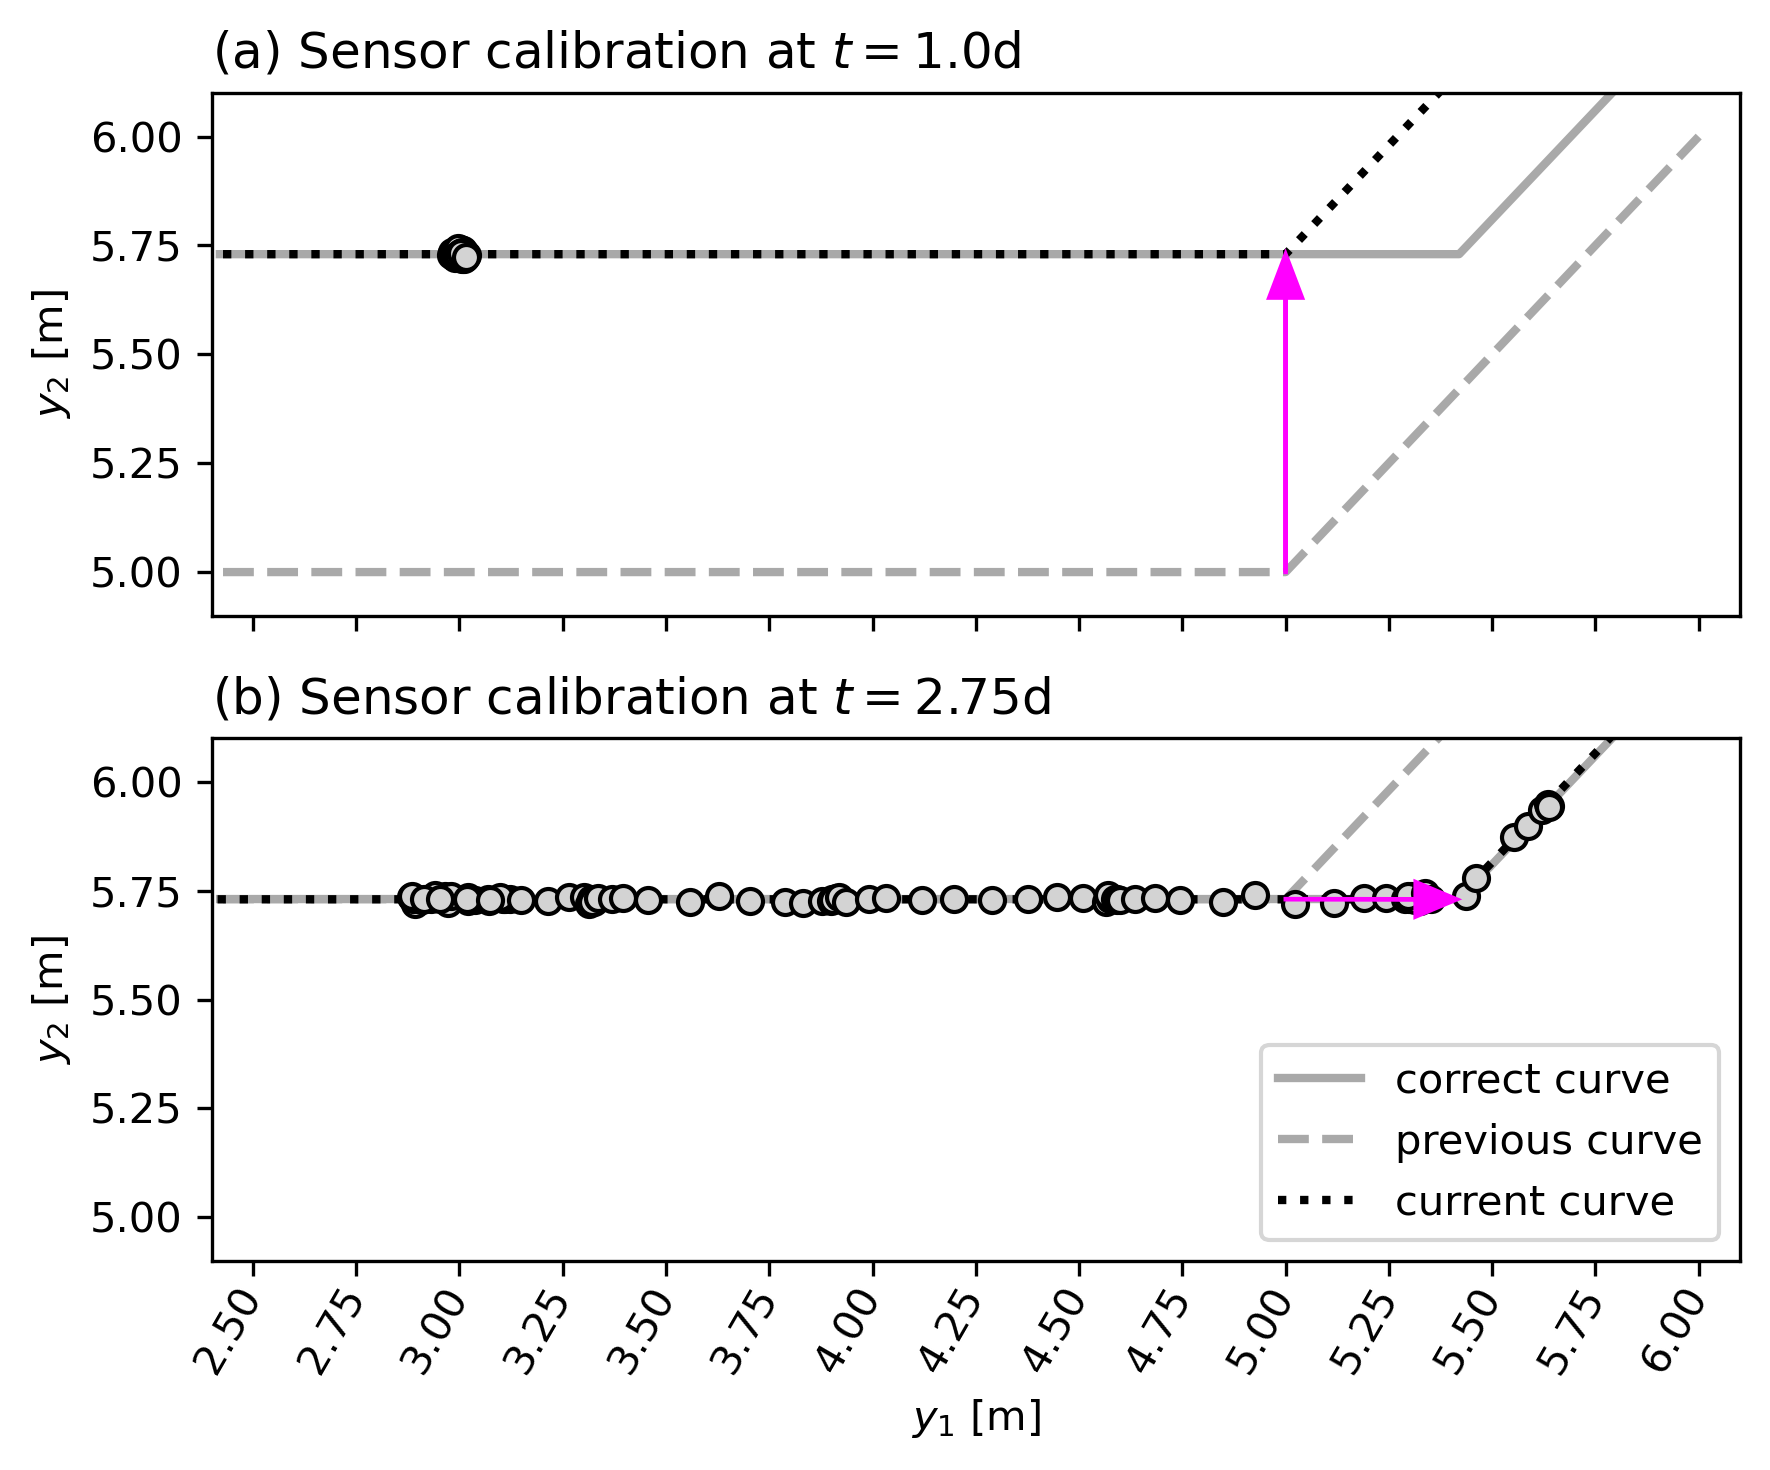

In [6]:
# Figure 2 - Scenario B
window = 96
fig, axs = plt.subplots(2,1,figsize=(6,5),dpi=300,sharex='all',sharey='all')
scenario = 1

sens                = sensors(delta) 
for panel, k in enumerate([96,96*11//4]):
    print(t_[k])
    argindex = np.where(t_[k]==ts)[0][0]
    betahat = trajectory_beta_hat[:,argindex]
    print(betahat)
    betahat_prev = trajectory_beta_hat[:,argindex-1]
    
    ax = axs[panel]
    
    filename = 'results_scenario_'+chr(ord('A')+scenario)+'.pckl'
    infile = open(filename,'rb')
    results = pickle.load(infile)
    
    trajectory_y = results['y']
    Ycal = trajectory_y[k-window:k,:]
    ax.plot(Ycal[:,0],Ycal[:,1],'o',color='black', mfc='lightgrey',zorder=3)
    
    xsim = np.linspace(2,6,301)
    Ysim = np.array([sens.simulate(x) for x in xsim])
    
    ax.plot(Ysim[:,0]+offset[0,k],Ysim[:,1]+offset[1,k],'-',lw=2,color='darkgrey',zorder=0,label='correct curve')
    ax.plot(Ysim[:,0]+betahat_prev[0],Ysim[:,1]+betahat_prev[1],'--',lw=2,color='darkgrey',zorder=1,label='previous curve')
    ax.plot(Ysim[:,0]+betahat[0],Ysim[:,1]+betahat[1],'k:',lw=2,zorder=2,label='current curve') 
    
    if panel==1:
        ax.set_xlabel('$y_1$ [m]')
        ax.legend(loc='lower right')
        pass
    ax.set_ylabel('$y_2$ [m]')
    ax.set_xlim([2.4,6.1])
    ax.set_ylim([4.9,6.1])
    ax.set_xticks(np.arange(2.5,6.1,0.25))
    ax.set_yticks(np.arange(5.0,6.1,0.25))
    
    delta_beta = betahat-betahat_prev
    hl = 0.1
    hw = 0.08
    ax.arrow(delta[1]+betahat_prev[0], 
             delta[1]+betahat_prev[1], 
             delta_beta[0]-hl*(panel==1), 
             delta_beta[1]-hl*(panel==0), color='magenta',zorder=4 , head_width=hw, head_length=hl)
    plt.setp(ax.get_xticklabels(), rotation=60, ha="right", va='center',
             rotation_mode="anchor") 
    ax.set_title(r'('+ chr(ord('a')+panel)+') Sensor calibration at $t='+str(t_[k])+'$d', loc='left')
    pass

plt.tight_layout()
fig.savefig('./figure/results_autocal.eps',bbox_inches='tight');
fig.savefig('./figure/results_autocal.tiff',bbox_inches='tight');

In [ ]:
# Figure 3 and 4 - Scenario C and D 
for scenario in range(2,4):
    
    print('\n Scenario '+chr(ord('A')+scenario) )
    
    filename = 'results_scenario_'+chr(ord('A')+scenario)+'.pckl'
    infile = open(filename,'rb')
    results = pickle.load(infile)
    
    trajectory_x = results['x']
    trajectory_y = results['y']
    trajectory_y_adjusted = results['y_adjusted']
    trajectory_y_hp = results['y_hp']
    trajectory_u = results['u']
    trajectory_y0_setpoint = results['y0_setpoint']
    #trajectory_psi =  results['psi_tilde']
    ts = results['t_cal']
    trajectory_beta_hat =  results['beta']
    N = len(trajectory_x)
    
    ysim = sens.simulate(trajectory_x.flatten()[:,None])
    error0 = trajectory_y_adjusted[:,0]-ysim[:,0]
    error1 = trajectory_y_adjusted[:,1]-ysim[:,1]
    k1 = np.where(t_>15)[0][0]
    arg_max0 = np.argmax(np.abs(error0[k1:]))
    arg_max1 = np.argmax(np.abs(error1[k1:]))
    print('Max. error - sensor 1: '+str(np.abs(error0[k1:])[arg_max0])+ '  - sensor 2: '+str(np.abs(error1[k1:])[arg_max1]))
        
    print('Mean absolute measurement error 1: '+str(np.std((error0))) ) 
    print('Median absolute measurement error 1: '+str(np.median((error0))) )
    print('Mean absolute measurement error 2: '+str(np.std(np.abs(error1))) ) 
    print('Median absolute measurement error 2: '+str(np.median(np.abs(error1))) )
    
    control_error = trajectory_x[:,0]-trajectory_y0_setpoint    
    print('Mean absolute control error: '+str(np.std(np.abs(trajectory_x[:,0]-3))) ) 
    print('Median absolute control error: '+str(np.median(np.abs(trajectory_x[:,0]-3))) )
    
            
    if scenario==2:
        fig, axs = plt.subplots(5,1,figsize=(5,7),dpi=300)
        pass
    else:
        fig, axs = plt.subplots(4,1,figsize=(5,5),dpi=300)
        pass
    if True:
        panelnumber = 0
        xtickstep = 30 
        ax = axs[0] 
        ax.plot(t_[:N],trajectory_y[:,0],'k-',lw=1,label=r'sensor 1: $\tilde{y}_1$',zorder=0) 
        ax.plot(t_[:N],trajectory_x[:,0],'g--',lw=1,label=r'level: $x$',zorder=2) 
        ax.plot(t_[:N],trajectory_y0_setpoint,'-',color='darkgrey',lw=1,label=r'setpoint: $y^*_1$',zorder=1)  
        ax.set_xticks(np.arange(0,t_[N],xtickstep))  
        if scenario==2:
            ax.set_ylim([1.8,+8.2]) 
            ax.set_yticks(np.arange(2,8.1,1))
            pass
        else:
            ax.set_ylim([-0.1,+8.2]) 
            ax.set_yticks(np.arange(0,8.1,2))
            pass
        ax.set_ylabel('Level [m]')
        ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
        ax.set_title('('+ chr(ord('a')+panelnumber)+') Level', loc='left')
        plt.setp(ax.get_xticklabels(), rotation=90, va='center', ha="right", rotation_mode="anchor")
        ax.set_xticklabels(labels=[])
        panelnumber +=1 
        
        ax = axs[1]  
        ax.plot(t_[:N],trajectory_y[:,1],'k-',lw=1,label=r'sensor 2: $\tilde{y}_2$',zorder=0) 
        ax.plot(t_[:N],trajectory_x[:,0],'g--',lw=1,label=r'level: $x$',zorder=2)   
        ax.hlines(y=5,xmin=0,xmax=t_[N],color='black',lw=1,linestyle=':',label=r'changepoint: $\delta_2$',zorder=1)
        ax.set_xticks(np.arange(0,t_[N],xtickstep))
        if scenario==2:
            ax.set_ylim([1.8,+8.2]) 
            ax.set_yticks(np.arange(2,8.1,1))
            pass
        else:
            ax.set_ylim([-0.1,+8.2]) 
            ax.set_yticks(np.arange(0,8.1,2))
            pass
        ax.set_ylabel('Level [m]')
        ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
        ax.set_title('('+ chr(ord('a')+panelnumber)+') Level', loc='left')
        plt.setp(ax.get_xticklabels(), rotation=90, va='center', ha="right", rotation_mode="anchor")
        ax.set_xticklabels(labels=[])
        panelnumber +=1 
        
        if scenario==2:
            ax = axs[2] 
            ax.plot(t_[:N],error0,'-',color='black',lw=1,label=r'sensor 1',zorder=0)  
            ax.hlines(y=0,xmin=0,xmax=t_[N],color='darkgreen',lw=1,linestyle='--',zorder=2)
            ax.plot(t_[:N],error1,'-',color='darkgrey',lw=1,label=r'sensor 2',zorder=1)  
            ax.set_xticks(np.arange(0,t_[N],xtickstep))
            ax.set_ylim([-0.05,+0.85])
            ax.set_yticks(np.arange(0,0.81,0.2))
            ax.set_ylabel(r'$(\tilde{y}-\hat{\beta})-y$ [m]')
            ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
            ax.set_title('('+ chr(ord('a')+panelnumber)+') Measurement error', loc='left')
            plt.setp(ax.get_xticklabels(), rotation=90, va='center', ha="right", rotation_mode="anchor")
            ax.set_xticklabels(labels=[])
            panelnumber +=1 
            pass
        
        if scenario==2:
            ax = axs[3]   
            pass
        else:
            ax = axs[2] 
            pass
        ax.plot(t_[:N],control_error,'k-',lw=1,label=r'control error',zorder=0) 
        ax.set_xticks(np.arange(0,t_[N],xtickstep))
        if scenario==2:
            ax.set_ylim([-.95,+.95])  
            ax.set_yticks(np.arange(-0.9,+0.91,0.3))
            pass
        else:
            ax.set_ylim([-2.1,+.1])  
            ax.set_yticks(np.arange(-2,+0.1,0.5))
            pass
        ax.hlines(y=0,xmin=0,xmax=t_[N],color='darkgreen',lw=1,linestyle='--',zorder=1)
        ax.set_ylabel(r'$x-y^*_1$ [m]') 
        ax.set_title('('+ chr(ord('a')+panelnumber)+') Control error', loc='left')
        ax.set_xticklabels(labels=[])
        panelnumber +=1 
        
        if scenario==2:
            ax = axs[4]   
            pass
        else:
            ax = axs[3] 
            pass 
        ax.step(t_[:N],offset[1,:N].T,'--',lw=2,color='black',where='post',label=r'$\beta_2$',zorder=0) 
        ax.step(t_[:N],offset[0,:N].T,'--',lw=2,color='darkgrey',where='post',label=r'$\beta_1$',zorder=1)  
              
        if scenario==2:
            ax.step(ts,trajectory_beta_hat[1,:].T,'-',lw=1,color='darkgrey',where='post',label=r'$\hat{\beta}_2$',zorder=2) 
            ax.step(ts,trajectory_beta_hat[0,:].T,'-',lw=1,color='black',where='post',label=r'$\hat{\beta}_1$',zorder=3)   
            pass
        if True:
            ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
            ax.autoscale()
            ax.set_xticks(np.arange(0,t_[N],xtickstep))
            ax.set_ylim([-0.05,+2.55])
            ax.set_yticks(np.arange(0,2.51,0.5)) 
            ax.set_xlabel('Time [d]')
            ax.set_ylabel(r'$\beta$ [m]')
            ax.set_title('('+ chr(ord('a')+panelnumber)+') Offset', loc='left')
            panelnumber +=1
            pass
        plt.setp(ax.get_xticklabels(), rotation=90, va='center', ha="right", rotation_mode="anchor")
        
        plt.tight_layout()
        fig.savefig('./figure/results_scenario_'+chr(ord('A')+scenario)+'.eps',bbox_inches='tight');
        fig.savefig('./figure/results_scenario_'+chr(ord('A')+scenario)+'.tiff',bbox_inches='tight');
        
        pass
    
    pass